In [1]:
%matplotlib inline

from PIL import Image
from torchvision import models, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy

def imshow(img):
    npimg = numpy.asarray(img)
    print("Displaying Image")
    plt.imshow(npimg)
    plt.show()

The neural network we will use in this classification tutorial is called squeezenet. Its available ready 
to download using the API given below.
<img src="http://www.mdpi.com/sensors/sensors-17-01951/article_deploy/html/images/sensors-17-01951-g003.png" />

In [2]:
# Load model
squeeze = models.squeezenet1_1(pretrained=True)
#squeeze = models.resnet18(pretrained=True)

# Data transformations.
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize((256,256)),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

Next we load an image and display it. This is the image loaded by default in the tutorial. Class members are welcome to try other examples from web.

<img src="input.jpg" />

Displaying Image


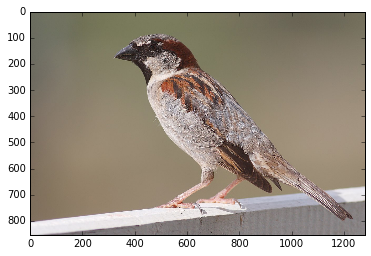

In [9]:
# Load image.
import requests
from io import BytesIO

#url = "https://upload.wikimedia.org/wikipedia/commons/4/45/A_small_cup_of_coffee.JPG"
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/House_Sparrow_mar08.jpg/1280px-House_Sparrow_mar08.jpg"
response = requests.get(url)

#img_pil = Image.open(open("input.jpg","r"))
img_pil = Image.open(BytesIO(response.content))
img_tensor = preprocess(img_pil)
img_tensor.unsqueeze_(0)
imshow(img_pil)

In [10]:
# Send image through network.
img_variable = Variable(img_tensor)
fc_out = squeeze(img_variable)

from labels import labels
print("Predicted Image: [{}]".format(labels[str(fc_out.data.numpy().argmax())]))


Predicted Image: [house finch, linnet, Carpodacus mexicanus]
